In [730]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector

import optuna
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
warnings.simplefilter(action='ignore', category=FutureWarning)

from catboost import Pool, CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [731]:
kfold = KFold(n_splits = 5, random_state=1234, shuffle=True)

In [732]:
data = pd.read_csv("전처리 최종 3.csv", encoding ="cp949")
df = pd.read_csv("전처리 최종 3.csv", encoding ="cp949")

In [733]:
for i, n in enumerate(df.columns):
    print(i, n)

0 Movie_name
1 Image_name
2 Movie_type
3 SpecIal
4 Month
5 Number_of_moviegoers
6 sales
7 Genre
8 Genre_comedy
9 Genre_drama
10 Genre_action
11 Genre_histroy
12 Genre_fantasy
13 Genre_animation
14 Genre_crime
15 Genre_adventure
16 Genre_mystery
17 Genre_SF
18 Genre_war
19 Genre_romance
20 Genre_thriller
21 Genre_documentary
22 Genre_horror
23 Genre_musical
24 Genre_family
25 Genre_concert
26 Genre_western
27 Genre_adult
28 Genre_n
29 Rating
30 Running_time
31 Color1
32 Color1_ratio
33 Color2
34 Color2_ratio
35 Color3
36 Color3_ratio
37 Color4
38 Color4_ratio
39 Color5
40 Color5_ratio
41 BoundingBox_Width_0
42 BoundingBox_Height_0
43 BoundingBox_Left_0
44 BoundingBox_Top_0
45 AgeRange_Low_0
46 AgeRange_High_0
47 Smile_Value_0
48 Smile_Confidence_0
49 Eyeglasses_Value_0
50 Eyeglasses_Confidence_0
51 Sunglasses_Value_0
52 Sunglasses_Confidence_0
53 Gender_Value_0
54 Gender_Confidence_0
55 Beard_Value_0
56 Beard_Confidence_0
57 Mustache_Value_0
58 Mustache_Confidence_0
59 EyesOpen_Value_0


In [735]:
columns_to_delete = [
    'Smile_Confidence_',
    'Eyeglasses_Confidence_',
    'Sunglasses_Confidence_',
    'Gender_Confidence_',
    'Beard_Confidence_',
    'Mustache_Confidence_',
    'EyesOpen_Confidence_',
    'MouthOpen_Confidence_',
    'FaceOccluded_Confidence_',
    '_5',
    '_6',
    '_7',
    '_8',
    '_9'
]

columns_to_delete = [col for col in df.columns if any(substring in col for substring in columns_to_delete)]

df.drop(columns=columns_to_delete, inplace=True)
# df.columns

In [739]:
def label_moviegoers(num):
    if num >= 10000000000:
        return 0
    elif num >= 3000000000:
        return 1
    elif num >= 500000000:
        return 2
    else:
        return 3


In [740]:
df["grade_num"] = df["sales"].apply(label_moviegoers)

In [741]:
df = df.loc[df["grade_num"]!=3]
df.groupby("grade_num").size()

grade_num
0    500
1    509
2    952
dtype: int64

In [657]:
X = df.drop(columns = ['Movie_name', 'Image_name', 'Movie_type', 'Number_of_moviegoers', 'Genre', 'Running_time', 'Genre_comedy', 'Genre_drama', 'Genre_action', 'Genre_histroy',
       'Genre_fantasy', 'Genre_animation', 'Genre_crime', 'Genre_adventure',
       'Genre_mystery', 'Genre_SF', 'Genre_war', 'Genre_romance',
       'Genre_thriller', 'Genre_documentary', 'Genre_horror', 'Genre_musical',
       'Genre_family', 'Genre_concert', 'Genre_western', 'Genre_adult',"SpecIal","Rating","sales","Month","grade_num"], axis=1)

y = df["grade_num"]

In [658]:
X["Genre_n"]

0        0
1        1
2        2
3        2
4        1
        ..
2932    17
3026    17
3041    17
3127    17
3141    17
Name: Genre_n, Length: 1961, dtype: int64

In [659]:
X["Genre_n"] = X["Genre_n"].astype(str)

In [660]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1961 entries, 0 to 3141
Columns: 485 entries, Genre_n to part_12
dtypes: float64(412), int64(72), object(1)
memory usage: 7.3+ MB


In [661]:
X["Genre_n"].info()

<class 'pandas.core.series.Series'>
Index: 1961 entries, 0 to 3141
Series name: Genre_n
Non-Null Count  Dtype 
--------------  ----- 
1961 non-null   object
dtypes: object(1)
memory usage: 30.6+ KB


In [662]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state= 42
)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [699]:
# 학습 데이터와 테스트 데이터 분할
# cat_features =  X["Genre_n"]

# CatBoostClassifier 초기화 및 학습
cat_model = CatBoostClassifier(random_state=42,iterations=100, learning_rate= 0.1,depth=5, verbose=False)
cat_model.fit(X_train, y_train)
# cat_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss')
# scores = cross_val_score(cat_model, X_train, y_train, cv=kfold, scoring='accuracy')

# cat_model.fit(X_train,y_train,
#               cat_features =np.where(X_train.dtypes != np.float)[0] , eval_set=(X_val, y_val))

# # np.where(X_train.dtypes != np.float)[0]

In [700]:
y_pred = cat_model.predict(X_val)
accuracy_score(y_val, y_pred)

0.5114503816793893

In [692]:
temp = pd.DataFrame(cat_model.feature_importances_)
temp["col_name"] = X_train.columns
temp2 = temp.sort_values(by=0,ascending =False)
temp2

,0,col_name
25,4.180552,Emotions_ANGRY_Confidence_0
471,3.842766,text_rate
7,2.182899,Color4
472,2.029543,title_rate
2,1.935372,Color1_ratio
...,...,...
314,0.000000,Landmarks_mouthLeft_Y_3
315,0.000000,Landmarks_mouthRight_X_3
320,0.000000,Landmarks_leftEyeBrowLeft_Y_3
321,0.000000,Landmarks_leftEyeBrowRight_X_3


In [680]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.16      0.26        94
           1       0.00      0.00      0.00       109
           2       0.49      0.96      0.65       190

    accuracy                           0.50       393
   macro avg       0.39      0.37      0.30       393
weighted avg       0.40      0.50      0.38       393



C:\Users\NT551XCJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NT551XCJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NT551XCJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [681]:
print(confusion_matrix(y_test, y_pred))

[[ 15   0  79]
 [  0   0 109]
 [  7   0 183]]


In [682]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

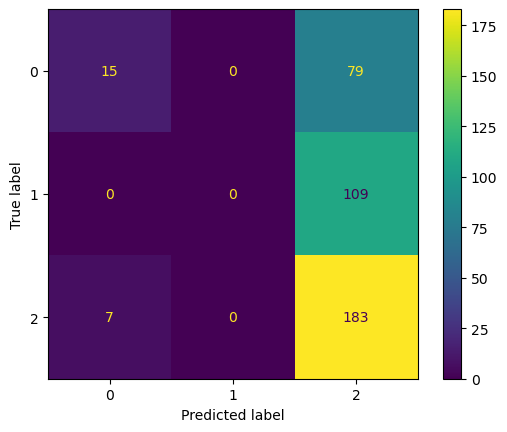

In [683]:
ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, y_pred),
                      display_labels=cat_model.classes_).plot()


In [539]:
for i in range(len(temp2)):
    print(temp2.iloc[i,:])

0                              3.811392
col_name    Emotions_ANGRY_Confidence_0
Name: 25, dtype: object
0            2.919698
col_name    text_rate
Name: 471, dtype: object
0                                 1.448448
col_name    Emotions_CONFUSED_Confidence_1
Name: 119, dtype: object
0                 1.434683
col_name    Gender_Value_0
Name: 20, dtype: object
0               1.394867
col_name    Color5_ratio
Name: 10, dtype: object
0                       1.239078
col_name    Quality_Brightness_0
Name: 96, dtype: object
0           1.21246
col_name     Color1
Name: 1, dtype: object
0                  1.040158
col_name    AgeRange_High_0
Name: 16, dtype: object
0           1.039666
col_name      Color2
Name: 3, dtype: object
0                       1.025755
col_name    FaceOccluded_Value_0
Name: 99, dtype: object
0                 0.994415
col_name    Gender_Value_1
Name: 112, dtype: object
0                     0.959459
col_name    Landmarks_nose_Y_1
Name: 134, dtype: object
0         

In [ ]:
#오분류 데이터 

In [702]:


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 첫 번째 CatBoostClassifier 모델 학습
model1 = CatBoostClassifier(iterations=100, learning_rate=0.05, depth=6, verbose=0)
model1.fit(X_train, y_train)

# 첫 번째 모델로 예측
y_pred1 = model1.predict(X_test)



In [716]:
# 오분류된 데이터 식별
misclassified_indices = np.where(y_pred1 != y_test.values)[0]

# 오분류된 데이터 추출
X_misclassified = X_test.iloc[misclassified_indices]
y_misclassified = y_test.iloc[misclassified_indices]


# # # 두 번째 CatBoostClassifier 모델 학습
model2 = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=10, verbose=0)
model2.fit(X_misclassified, y_misclassified)




In [717]:
# # # 두 번째 모델로 예측
y_pred2 = model2.predict(X_misclassified)

# 결과 출력
# print("첫 번째 모델 예측:", y_pred1)
# print("오분류된 데이터의 두 번째 모델 예측:", y_pred2)



In [718]:
accuracy2 = accuracy_score(y_misclassified, y_pred2)
accuracy2

1.0

In [597]:

def lgbc_objective( trail ) :
    paramas = {
        "objective":"multiclass",
        "num_class":3,
        "n_estimators" : trail.suggest_int("n_estimators", 10,100),
        "learning_rate":trail.suggest_float("learning_rate", 0.001, 0.9),
        "max_depth":trail.suggest_int("max_depth", 1, X_train.shape[1]),
        "min_split_gain":trail.suggest_float("min_split_gain", 0.001, 30),
        "subsample":trail.suggest_float("subsample", 0.1,0.9),
        "colsample_bytre":trail.suggest_float("colsample_bytre", 0.1,1)
    }

    lgbc = LGBMClassifier(n_jobs=-1, random_state=1999,**paramas)
    scores = cross_val_score( lgbc,
                         X_train, y_train,
                          cv = kfold, scoring="accuracy")

    acc_mean = scores.mean()

    return acc_mean

In [598]:
# nan_check = X_train.isna().any()
# print(nan_check[nan_check])

In [599]:
lgbc_study = optuna.create_study(direction="maximize")
lgbc_study.optimize(lgbc_objective, n_trials=10, n_jobs=-1)

[I 2024-05-20 20:09:47,456] A new study created in memory with name: no-name-b63fb733-b0b9-44d5-b15e-3d420f9631e8
[I 2024-05-20 20:09:51,955] Trial 7 finished with value: 0.47959748478866937 and parameters: {'n_estimators': 20, 'learning_rate': 0.6161619776997838, 'max_depth': 55, 'min_split_gain': 16.648140004025727, 'subsample': 0.722271185272898, 'colsample_bytre': 0.6947414692791399}. Best is trial 7 with value: 0.47959748478866937.
[I 2024-05-20 20:09:53,358] Trial 0 finished with value: 0.48023646242445206 and parameters: {'n_estimators': 32, 'learning_rate': 0.3134242441123538, 'max_depth': 123, 'min_split_gain': 21.445894833302667, 'subsample': 0.3890091918679959, 'colsample_bytre': 0.8098041874180647}. Best is trial 0 with value: 0.48023646242445206.
[I 2024-05-20 20:09:54,061] Trial 5 finished with value: 0.4789524022710161 and parameters: {'n_estimators': 36, 'learning_rate': 0.6750690146873672, 'max_depth': 200, 'min_split_gain': 8.472314527590619, 'subsample': 0.3698972676

In [601]:
print(lgbc_study.best_trial.values)
print(lgbc_study.best_params)

[0.48404387375104285]
{'n_estimators': 42, 'learning_rate': 0.4762387880722826, 'max_depth': 415, 'min_split_gain': 11.683440150183719, 'subsample': 0.13166543131701386, 'colsample_bytre': 0.9418869926281253}


In [260]:
opt_lgbc = LGBMClassifier( n_jobs=-1,
                                random_state=1234,
                                 **lgbc_study.best_params)

opt_lgbc.fit(X_train, y_train)
y_pred = opt_lgbc.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("정확도:", accuracy)

print("분류 보고서:")
print(classification_report(y_val, y_pred))

ValueError: No trials are completed yet.

In [ ]:
opt_lgbc.feature_importances_
d = pd.DataFrame( data = opt_lgbc.feature_importances_)
d["col_name"] = X.columns
d[:30].sort_values(by =0, ascending=False)

In [ ]:
# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 생성
lgb_estimator = lgb.LGBMClassifier(n_estimators=3, learning_rate=0.05, boost_from_average=False, n_jobs=-1)

# SequentialFeatureSelector 설정 (전진 선택)
sfs = SequentialFeatureSelector(lgb_estimator, n_features_to_select=2, direction='forward')

# 피팅하여 최적의 특성 선택
sfs.fit(X_train, y_train)

# 선택된 특성
selected_features = sfs.get_support(indices=True)
print("Selected features:", selected_features)

# 선택된 특성만을 사용하여 데이터셋 재구성
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# 최적의 특성을 사용하여 LightGBM 모델 학습
lgb_estimator.fit(X_train_selected, y_train)

# 예측 및 평가
y_pred = lgb_estimator.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with selected features: {accuracy * 100:.2f}%')


In [ ]:
accuracy

In [152]:
accuracy.best_params

AttributeError: 'numpy.float64' object has no attribute 'best_params'

In [ ]:
X = df.drop(columns = ['Movie_name', 'Image_name', 'Movie_type', 'Number_of_moviegoers', 'Genre', 'Running_time', 'Genre_comedy', 'Genre_drama', 'Genre_action', 'Genre_histroy',
       'Genre_fantasy', 'Genre_animation', 'Genre_crime', 'Genre_adventure',
       'Genre_mystery', 'Genre_SF', 'Genre_war', 'Genre_romance',
       'Genre_thriller', 'Genre_documentary', 'Genre_horror', 'Genre_musical',
       'Genre_family', 'Genre_concert', 'Genre_western', 'Genre_adult',"SpecIal","Genre_n","Rating","sales","Month","grade_num"], axis=1)

y = df["grade_num"]

In [722]:
y_pred1 = opt_lgbc.predict(X_val)

ValueError: Number of features of the model must match the input. Model n_features_ is 944 and input n_features is 485